In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
data = pd.read_csv("supermarket_sales_nan.xlsx - Sheet1.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,"74,69",7,"26,1415","548,9715",1/5/2019,13:08,Ewallet,"522,83","4,761904762","26,1415","9,1"
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,"15,28",5,"3,82","80,22",3/8/2019,10:29,Cash,"76,4","4,761904762","3,82","9,6"
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,"46,33",7,"16,2155","340,5255",3/3/2019,13:23,Credit card,"324,31","4,761904762","16,2155","7,4"
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,"58,22",8,"23,288","489,048",1/27/2019,20:33,Ewallet,"465,76","4,761904762","23,288","8,4"
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,"86,31",7,"30,2085","634,3785",2/8/2019,10:37,Ewallet,"604,17","4,761904762","30,2085","5,3"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Invoice ID               1000 non-null   object
 1   Branch                   1000 non-null   object
 2   City                     1000 non-null   object
 3   Customer type            1000 non-null   object
 4   Gender                   1000 non-null   object
 5   Product line             1000 non-null   object
 6   Unit price               967 non-null    object
 7   Quantity                 1000 non-null   int64 
 8   Tax 5%                   1000 non-null   object
 9   Total                    1000 non-null   object
 10  Date                     1000 non-null   object
 11  Time                     1000 non-null   object
 12  Payment                  1000 non-null   object
 13  cogs                     1000 non-null   object
 14  gross margin percentage  1000 non-null   

In [29]:
# Change Dtype
change_float = ['Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
for f in change_float:
    data[f] = pd.to_numeric(data[f].str.replace(',', '.').astype(float))

data['Date'] = pd.to_datetime(data['Date'], format = "%m/%d/%Y")

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               967 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [33]:
'''
- Vẽ bar chart thể hiện Doanh thu (Total) theo từng dòng sản phẩm (Product line)
'''
# Perpare data
x = data['Total'].unique()
y = data['Product line'].unique()
Total_by_Product = data.groupby('Product line')['Total'].sum().reset_index()
Total_by_Product.rename(columns={'Total':'Revenue'}, inplace= True)
Total_by_Product

,Product line,Revenue
0,Electronic accessories,54337.5315
1,Fashion accessories,54305.8950
2,Food and beverages,56144.8440
3,Health and beauty,49193.7390
4,Home and lifestyle,53861.9130
5,Sports and travel,55122.8265


C:\Users\luong\AppData\Local\Temp\ipykernel_20520\3360191719.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Total_by_Product.sort_values(by= 'Revenue'),
C:\Users\luong\AppData\Local\Temp\ipykernel_20520\3360191719.py:4: UserWarning: The palette list has more values (1000) than needed (6), which may not be intended.
  sns.barplot(data=Total_by_Product.sort_values(by= 'Revenue'),


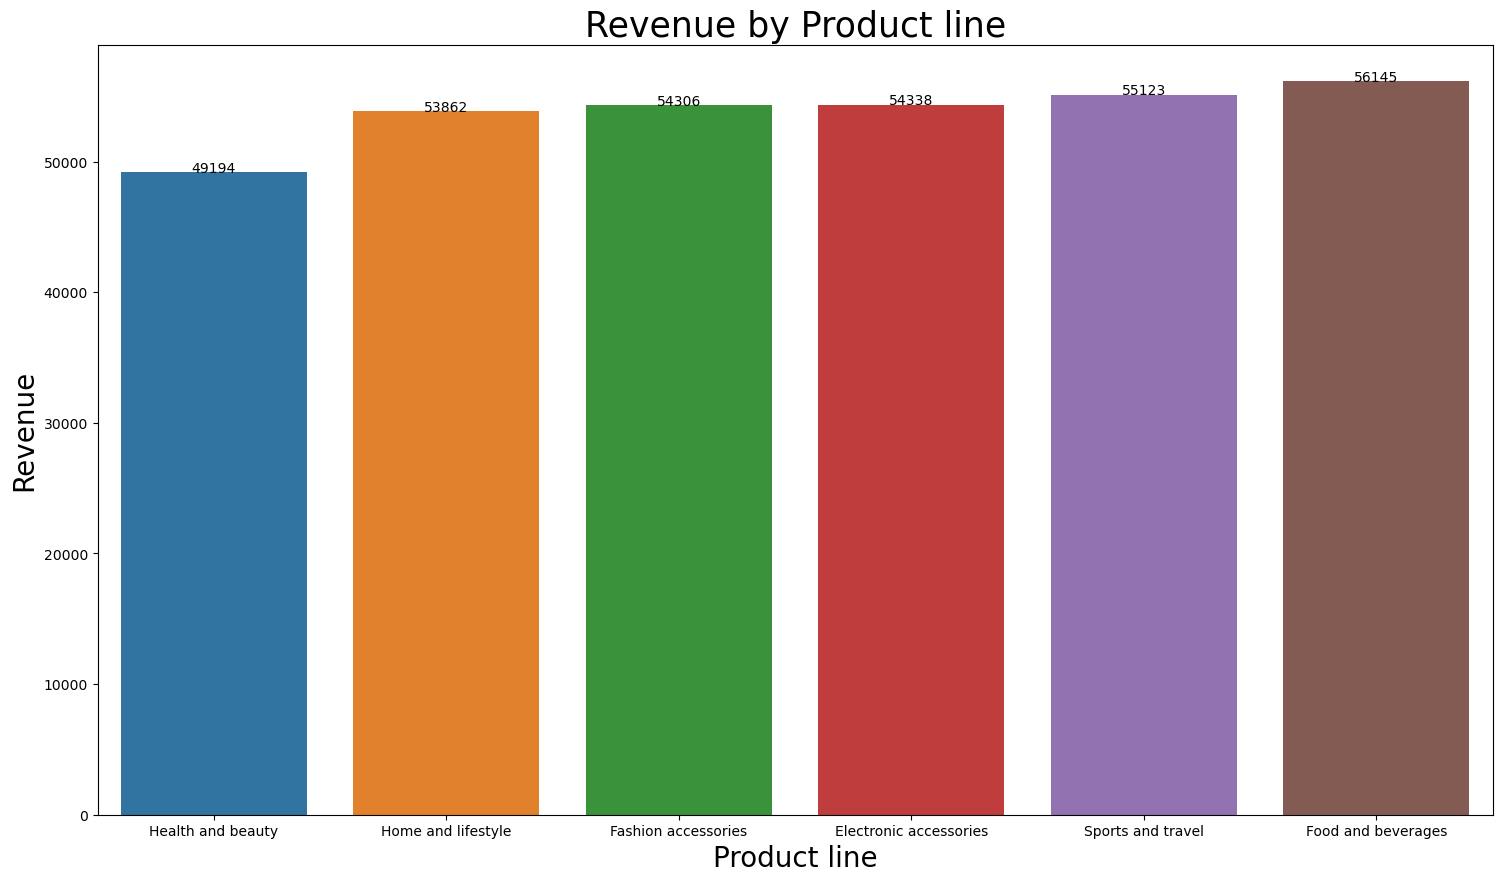

In [43]:
# Plot
plt.figure(figsize = (18,10))
colors = sns.color_palette("tab10", len(data))
sns.barplot(data=Total_by_Product.sort_values(by= 'Revenue'), 
            x= 'Product line', y='Revenue', 
            palette=colors)

# Decorate
plt.title('Revenue by Product line', fontsize= 25)
plt.xlabel('Product line', fontsize= 20)
plt.ylabel('Revenue', fontsize= 20)
#Add label
x = Total_by_Product['Product line'].unique()
y = Total_by_Product['Revenue'].unique()
addlabels(x, y)

In [35]:
# ADD labels
def addlabels(xs, ys):
    for x, y in zip(xs, ys): #?? zip

        label = "{:.0f}".format(y) #???

        plt.annotate(label, # text
                     xy = (x, y), #The coordinates to position the label
                     xytext = (x, y + 10),
                     ha = 'center' 
                    )


# ADD text
def addtext(x, y, text):
    plt.annotate(
        text, #text
        xy = (x, y),
        xytext = (x, y + 5),
        color = 'red',
        arrowprops= dict(facecolor = 'black', width = 2, headwidth = 4, headlength = 4),
        horizontalalignment = 'left', 
        verticalalignment = 'top'
    )

In [ ]:
'''
- Vẽ line chart thể hiển Doanh số (Quantity) theo từng tháng và từng thành phố 
X: Từng năm, Y: Doanh số và thành phố là các cot 
'''

In [92]:
data2 = data[['Date', 'Quantity']]
data2['Month'] = data['Date'].dt.month
data2['Month'] = data2['Month'].astype('str')
data2 = data2.groupby('Month')['Quantity'].sum().reset_index()
data2

C:\Users\luong\AppData\Local\Temp\ipykernel_20520\1114579684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Month'] = data['Date'].dt.month
C:\Users\luong\AppData\Local\Temp\ipykernel_20520\1114579684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Month'] = data2['Month'].astype('str')


,Month,Quantity
0,1,1965
1,2,1654
2,3,1891


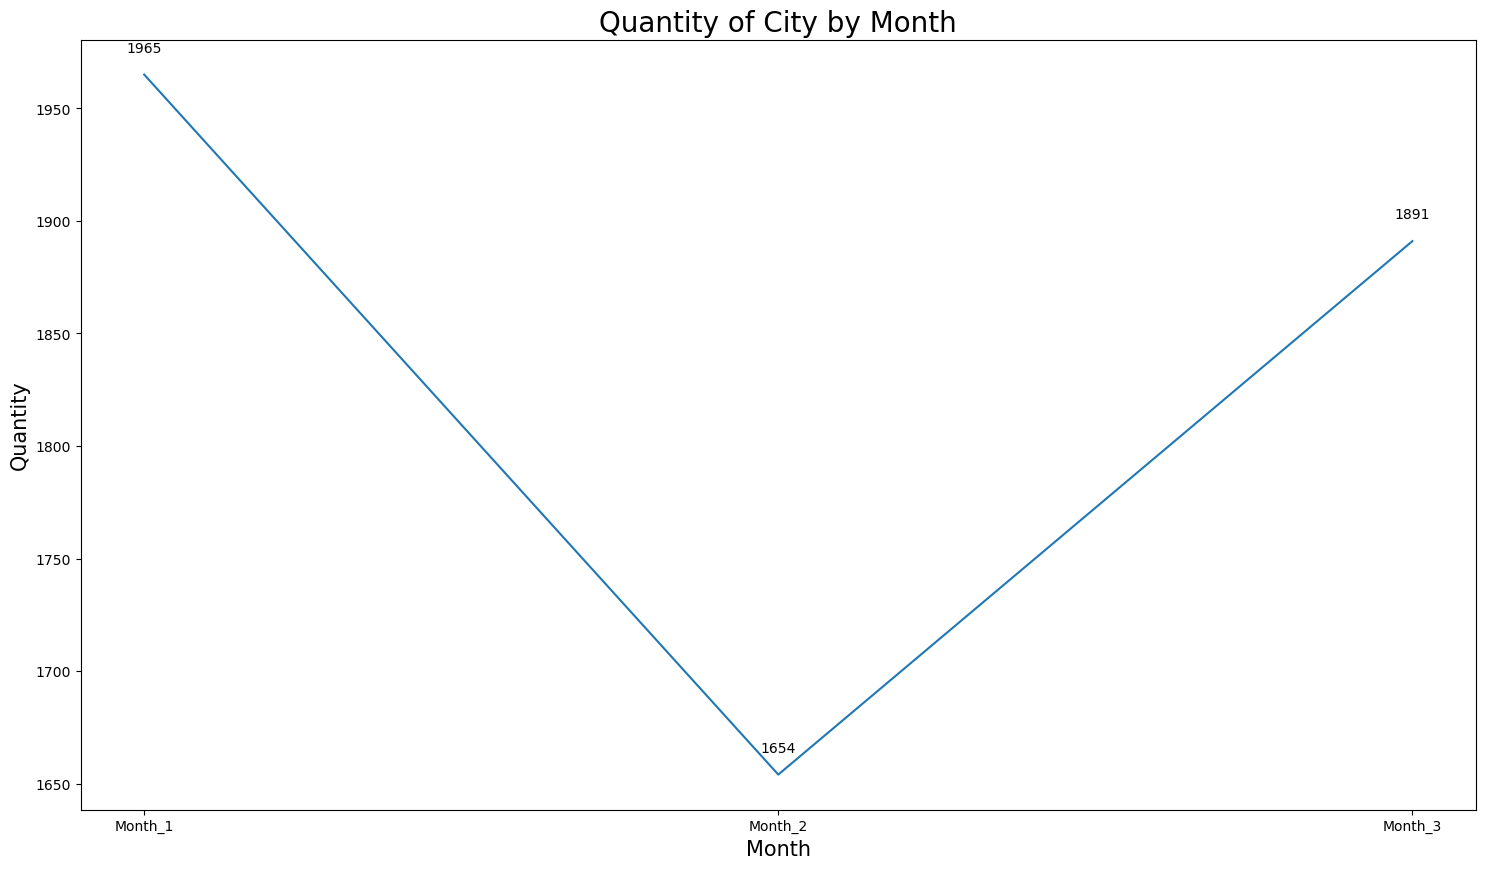

In [94]:
plt.figure(figsize= (18,10))
sns.lineplot(data= data2, x='Month', y='Quantity')

plt.title('Quantity of City by Month', fontsize= 20)
plt.xlabel('Month', fontsize= 15)
plt.ylabel('Quantity', fontsize= 15)


x = data2['Month'].unique().astype('str')
y = data2['Quantity'].unique()

values = ['Month_' + n for n in x]
plt.xticks(x, values)


addlabels(x,y)

([<matplotlib.axis.XTick at 0x128cbf139e0>,
 [Text(0.0, 0, 'Month_1'), Text(1.0, 0, 'Month_2'), Text(2.0, 0, 'Month_3')])

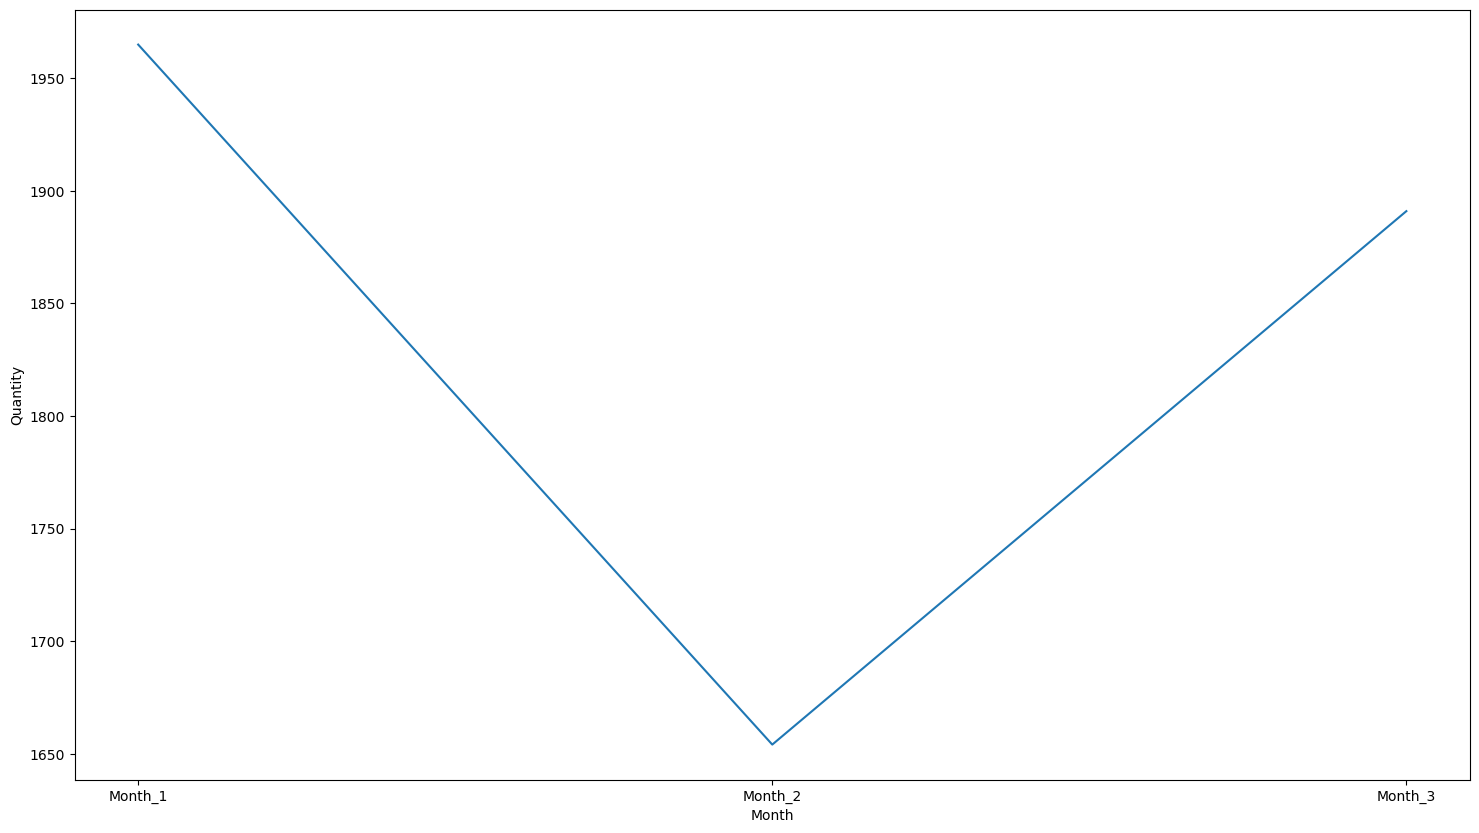

In [98]:
# Option 2
plt.figure(figsize= (18, 10))
sns.lineplot(data= data2, x= 'Month', y= 'Quantity')
month = ['Month_' + n for n in x]
plt.xticks(x, month)